# Linear Regression and getting the Normal Equation

In [1]:
import numpy as np

np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)

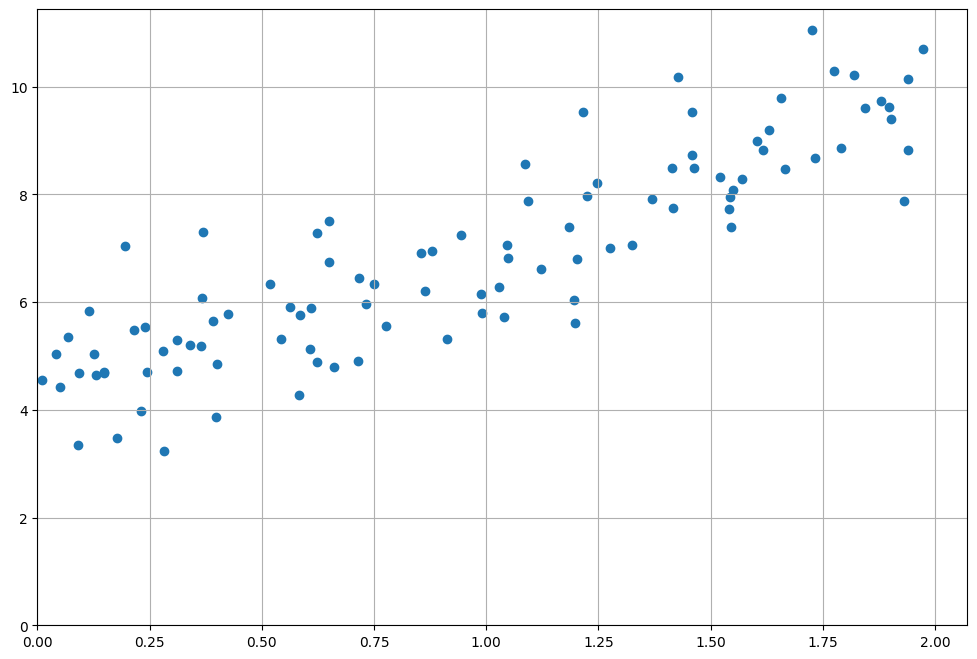

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.scatter(X, y)
plt.xlim(0)
plt.ylim(0)
plt.grid()
plt.show()

In [3]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y #@ is matrix multiplication, . is the dot product and linalg is linear algebra, using the inverse matrix method

In [4]:
theta_best #Gives an array of theta values that are good (Not exactly what we wanted due to the noise of the equation)

array([[4.21509616],
       [2.77011339]])

In [5]:
X_new = np.array([[0], [2]]) #Matrix multiplication of the theta_best and the X to get the y predictions from the linear regression 
X_new_b = add_dummy_feature(X_new) #b just means that an X0=1 is added to each instance
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

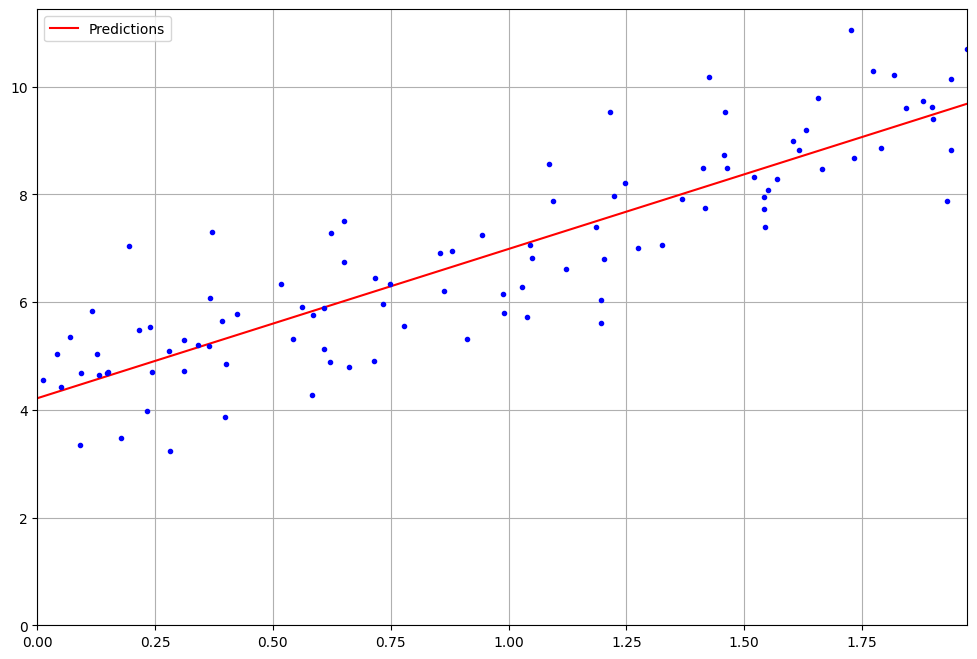

In [6]:
plt.figure(figsize=(12,8))
plt.plot(X_new, y_predict, 'r-', label="Predictions")
plt.plot(X, y, "b.")
plt.legend()
plt.grid()
plt.xlim(0, max(X))
plt.ylim(0)
plt.show()

- The above was how to do it manually
- Now using scikit learn below

In [7]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_ #coef is also the feature weights

(array([4.21509616]), array([[2.77011339]]))

In [8]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

- LinearRegression class os derived from np.linalg.lstsq 

In [9]:
theta_best_svd, residuals, rank, s =np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

- Can also do

In [10]:
np.linalg.pinv(X_b) @ y #Uses the pseudoinverse

array([[4.21509616],
       [2.77011339]])

- SVD stands for single value composition
- The pinv takes the X and sets anything thats below a threshold to 0 and transposes all non zero values and then performs matmul
- A lot more efficient than the linear regression method

# Computational Complexity

- The computational compelxity of Normal Equation and SVD get really large when lots of features are used. 
- Gradient Descent is better suited for these types of problems

# Gradient Descent

 - Optimisation problem that minimises a cost function
 - Just think of an unevenm bowl, and you try to get to the bottom of it
 - No local min, just a globsl

# Batch Gradient Descent

- Computes the partial derivative of each parameter with respect to the cost function
- Checks how each partial derivative minimises the cost function
- Doesnt scale too well with a lot of dimensions and takes long
- Need to calcuilate the learning step


In [11]:
eta = 0.1 #Learning rate
n_epochs = 1000
m = len(X_b) #Number of instances

np.random.seed(42)
theta = np.random.randn(2, 1) #Random initialised model paramters

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

In [12]:
theta #Same results as the previous linear regression

array([[4.21509616],
       [2.77011339]])

# Stochastic Gradient Descent

- Quick to train and can be done for large amounts of data
- Random in nature so it can sometimes not converge as perfectly as other GD algorithms
- Works well when the cost function is irregular by jumping out of local minima and finding the maxima
- A schedule determines the learning rate, if it should be smaller or larger which allows it to converge later
- Requires less epochs than batch gradient descent
- A partial fit method can do one epoch a a time, where you can specify to change the hyperparameters at different stages to optimise the algorithm

In [13]:
n_epochs = 50

t0, t1 = 5, 50 #Hyperparameters for learning schedule

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for iteration in range(m): #Where m is the number of instances as stated before
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients


In [14]:
theta #Runs decently well with just 50 iterations

array([[4.21076011],
       [2.74856079]])

- Implementing SGD using scikit learn can be seen below

In [15]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000,
                       tol=1e-5,
                       penalty=None,
                       eta0=0.01,
                       n_iter_no_change=100,
                       random_state=42)

sgd_reg.fit(X, y.ravel()) #Ravel makes sure y is a 1D target

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [16]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

# Mini Batch Gradient Descent

- Works on random sets instead of random instances
- Converges better than batch gradient dscent and isnt as eratic

# Polynomial Regression

- Can still use the linear regression method but adding polynomial features

In [17]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * (X ** 2) + X + 2 + np.random.randn(m, 1)

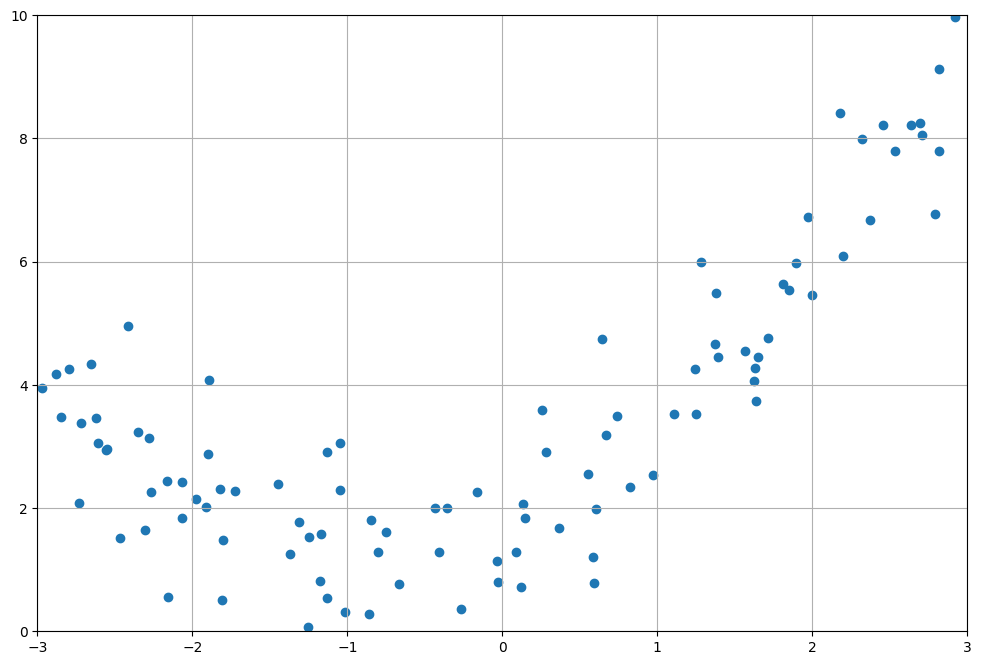

In [18]:
plt.figure(figsize=(12,8))
plt.scatter(X, y)
plt.grid()
plt.xlim(-3, 3)
plt.ylim(0, 10)
plt.show()

In [19]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [20]:
X_poly[0] 

array([-0.75275929,  0.56664654])

In [21]:
#Using the lin reg on the X_poly

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

# Learning Curves

- Need to know how to determine if the regression is underfitted, overfitted, or jsut right
- Using cross validation at each iteration/epoch to get the error rate is a good way to see its learning curve

In [22]:
from sklearn.model_selection import learning_curve

#gets the learning curve for the lienar regression model using X and y data,  with train_size amount of samples to train the data with 5 folds and an rmse scoring
train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(),
    X, y,
    train_sizes=np.linspace(0.01, 1.0, 40),
    cv=5,
    scoring="neg_root_mean_squared_error"
)

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

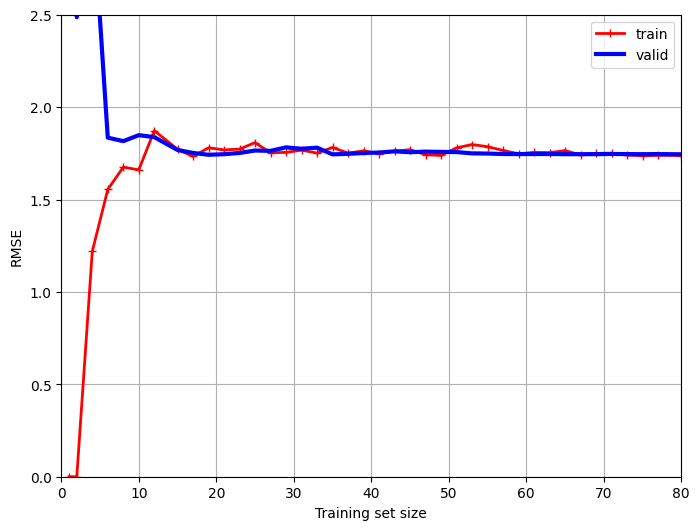

In [23]:
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_errors, 'r-+', linewidth=2, label='train')
plt.plot(train_sizes, valid_errors, 'b-', linewidth=3, label='valid')
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.xlim(0, 80)
plt.ylim(0, 2.5)
plt.grid()
plt.legend()

- The above model is udnerfitting due to the lines meeting and the errors being high

In [24]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression()
)

train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error"
)

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

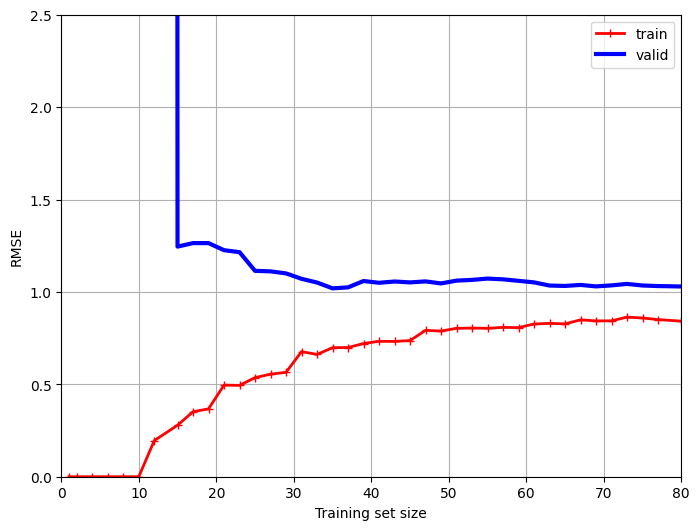

In [25]:
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_errors, 'r-+', linewidth=2, label='train')
plt.plot(train_sizes, valid_errors, 'b-', linewidth=3, label='valid')
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.xlim(0, 80)
plt.ylim(0, 2.5)
plt.grid()
plt.legend()

- Overfitting due to large gap between training RMSE and validation RMSE
- Errors are much lower than usual
- Model train much better on the train set than validation due to overfitting

### The Bias/Variance Trade-Off

- Bias is due to wrong assumptions and introduces underfitting if high 
- Variance is the sensitivity of the model duer to a high number of DOF of the mdoels and results in overfitting
- Irreducible error is due to the noise of the data and needs to be fixed from the data 

- Increasing model complexity increases variance but reduced bias, this is the trade off

# Regularized Linear Models

- Fewer DOF make it harder to overfit
- Regularization achieved through contraining weights of the model

# Ridge Regression

- Ridge regression corrects for overfitting of the dataset
- Add regularization term to the MSE and evaluate using the original RMSE
- A higher alpha value will decrease variance but increase bias (more reasonable predictions but less extreme) since it makes predictions flatter

In [26]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [27]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55325833]])

# Lasso Regression

- Implements a penalty to prevent overfitting
- Uses regularization to choose the optimal features that will help in improving prediction accuracy

In [28]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

# Elastic Net Regression

- Elastic net regression is a mix of lasso and ridge regression. 
- Variable r determines if it more lasso or ridge
- Elastic preferred over lasso since it gets rid of number of features
- Very powerful and gets rid of overfitting          

In [29]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

# Early Stopping

- Stops when the validation set RMSE reaches a minimum
- Stop only when the validation set has been increasing after the minimum for a certain amount of iterations and you are sure model wont perform any better
- The increasing after the minimum validation RMSE is because of overfitting

In [30]:
from copy import deepcopy
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

#Creates quadratic dataset and splits it
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)
X_train, y_train = X[: m // 2], y[: m // 2, 0]
X_valid, y_valid = X[m // 2 :], y[m // 2 :, 0]

#All features added polynomial features and then scaled accordingly
preprocessing = make_pipeline(
    PolynomialFeatures(degree=90, include_bias=False),
    StandardScaler()
)

X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.transform(X_valid)
sgd_reg = SGDRegressor(penalty=None, eta0=0.002, random_state=42)
n_epochs=500
best_valid_rmse = float('inf')

for epoch in range(n_epochs):
    sgd_reg.partial_fit(X_train_prep, y_train)
    y_valid_predict = sgd_reg.predict(X_valid_prep)
    val_error = mean_squared_error(y_valid, y_valid_predict, squared=False)
    if val_error < best_valid_rmse:
        best_valid_rmse = val_error
        best_model = deepcopy(sgd_reg) #Copies hyperparameters and learned parameters

# Logistic Regression

- the probability that an object belongs to a certain class 
- Uses 50% as a threshold and is represented using a Sigmoid function that will indicate a 0 or 1

# Training and Cost Function

- Do it so that it estimates high probabilities for positive instances and low probabilities for negative imstaces (a 1 or 0 respectively)
- Luckily, the log loss cost function is a convex function, so the gradient descent method can be used
- Minimizing this function increases likelihood of the model being optimal

# Decision boundaries 

- Can show decision boundaries by looking at the iris dataset

In [31]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [32]:
iris.data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [33]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == "virginica"
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [35]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1) #Reshaped to a column vector, not a list
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:,1] >= 0.5][0,0] #takes the ones that have a probability of greater than 0.5

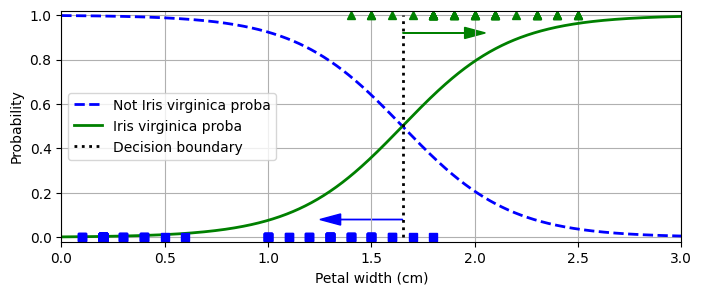

In [36]:
plt.figure(figsize=(8, 3))  # extra code – not needed, just formatting
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2,
         label="Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2,
         label="Decision boundary")

# extra code – this section beautifies and saves Figure 4–23
plt.arrow(x=decision_boundary, y=0.08, dx=-0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="b", ec="b")
plt.arrow(x=decision_boundary, y=0.92, dx=0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="g", ec="g")
plt.plot(X_train[y_train == 0], y_train[y_train == 0], "bs")
plt.plot(X_train[y_train == 1], y_train[y_train == 1], "g^")
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend(loc="center left")
plt.axis([0, 3, -0.02, 1.02])
plt.grid()

plt.show()

In [37]:
decision_boundary

1.6516516516516517

In [38]:
log_reg.predict([[1.7], [1.5]]) #Test below and above threshold for if it is the virginica iris

array([ True, False])

# Softmax Regression

- Logistic regression using multiple classes
- Get the exponential and normalize for the score of the instance x with respecty to each class
- the best score is the class that it belongs to 
- The cross entropy cost functiopn is a famous loss function for classification and can be seen as below

In [39]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

softmax_reg = LogisticRegression(C=30, random_state=42)
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=30, random_state=42)

In [40]:
softmax_reg.predict([[5,2]])

array([2])

In [41]:
softmax_reg.predict_proba([[5,2]]).round(2) #96% probability that it is a virginica, 4% its  versicolor and 0 its the other one

array([[0.  , 0.04, 0.96]])

# Excercises

1. Any of the gradient descent ones, more specifically Stochastic Gradient Descent
2. Can definitely use StandardScalar. The algorithm that would suffer is Gradient Descent algorithms since the cost function may be quite uneven
3. Logistic regression models use the probability that a class belongs to one and not the other. The way that this is done is by finding a cost function and using gradient descent. The cost function for a logistic regression model is convex in nature, meaning that this optimisation problem is guaranteed to find the bottom or the global minimum and wont get stuck at a local minimum
4. Not all gradient descent algorithms reach to the same model. Algorithms such as Stochastic Gradient descent rarely converge to the true local minimum due to the randomness of the theta 1 and theta 2 values chosen. On the other hand, batch gradient descent will approach the global minimum slowly. Mini batch will also perform like Stochastic GD. The catch however is that these can actually converge to the optimal model if and only if the model reduces the learning rate incrementally. 
5. If the validation error keeps increasing, this is likely a result of overfitting. You can do he stop early method, where if you see that the model will not start to perform better, ie the validation error will not drop, then you stop the iteration when the validation error is minimum. This is when the training error isnt increasing. If both are increasing, then this is a sign of a high learning rate and the learning rate should be decreased. 
6. Its not a good idea to stop mini batch gradient descent immediately when validation error goes up due to the randomness of the algorithm, comparable to stochastic gradient descent. There is a chance that the validatione error will decrease again, and you have to look at the general overall trend, so let it run for longer. 
7. Reaching the vicinity of the optimal solution the fastest will be stochastic gradient descent as it uses the least amount of data, only using one instance at a tim,e. Only batch gradient descent will actually converge to the optimal. The way that stochastic and mini batch will converge is that through each epoch, the learnign rate is changed again, changed throughn the learning schedule. 
8. If using polynomial regression and I see that there is a large gap, most likely that the training error is much lower than the validation error, than this is a sign of overfitting to the training data. Ways to fix this are to increase the bias by allowing some generality in the assumptions made, reducing the variance by reducing the degrees of freedom present or in other words, reducing the amount of features present. Generally however, ridge, lasso, and elastic net regression are good ways to prevent it, as well as early stopping. Also increase the size of the training set
9. If thje training and validation are equal and quite high, this is an indication that the ridge regression model is underfitting. This underfitting is a by product of high bias and can be fixed by reducig the regularization parameter alpha
10. Linear regression doesnt have any regularization, meaning that the model is very prone to overfitting and is the reason Ridge Regression is prefered over linear, since ridge is like linear but with regularization, keeping the weights small and fitting the data well. On the other hand, Lasso is preferred over ridge since it uses a penalty that reduces least important features to zero and keeps import features, meaning that the fitting will be better and feature selection is performed automatically. Elastic net is preffered over lasso because lasso can behave eratically sometimes. Additionally, elastic net introduces an extra hyperparameter to tune so that it is more accurate.
11. Since there are 4 possibilities of outcomes and all thje outcomes are notf exclusive, its best to train two logistic regression models
12. Code below. 

In [42]:
#Implementing batch gradient descent with early stopping for softmax regression using numpy

X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"].values

In [43]:
X_with_bias = np.c_[np.ones(len(X)), X] #np.c_ turns slice objects into concatenation objects, so that now it stores np.ones len(X) times on X

In [44]:
#Making a test_train_split function without sklearn

test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = int(total_size - test_size - validation_size)

np.random.seed(42) #Fixes the seed so that each outcome following this is random but will be the same each time that the code is run
rnd_indices = np.random.permutation(total_size) #Just reorders the list randomly into a different permutation

X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_valid = X_with_bias[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]
X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

In [45]:
#Implementing One hot encoding from scratch
def to_one_hot(y):
    return np.diag(np.ones(y.max() + 1))[y] #Make a diagonal and put a y.max() + 1 item at the yth position

In [46]:
#One hot encodes the classes for the train, valid, and test set
Y_train_one_hot = to_one_hot(y_train) 
Y_valid_one_hot = to_one_hot(y_valid)
Y_test_one_hot = to_one_hot(y_test)

In [47]:
#Standard Scaling each of the sets
mean = X_train[:, 1:].mean(axis=0)
std = X_train[:,1:].std(axis=0)
X_train[:, 1:] = (X_train[:, 1:] - mean) / std
X_valid[:, 1:] = (X_valid[:, 1:] - mean) / std
X_test[:, 1:] = (X_test[:, 1:] - mean) / std


In [48]:
#Impementing the softmax function

def softmax(logits):
    exps = np.exp(logits)
    exp_sums = exps.sum(axis=1, keepdims=True)
    return exps / exp_sums

In [49]:
n_inputs = X_train.shape[1] #Equal to 3 since there are 2 features plus the bias term
n_outputs = len(np.unique(y_train)) #Equal to 3 since there are 3 iris classes

In [53]:
#Need to use the cost function and the equation for the gradients

eta = 0.5
n_epochs = 5001
m = len(X_train)
epsilon = 1e-5
best_loss = np.infty

np.random.seed(42)
Theta = np.random.randn(n_inputs, n_outputs)

for epoch in range(n_epochs):
    logits = X_train @ Theta # The softmax score
    Y_proba = softmax(logits) #Gets the probability that its a certain class
    Y_proba_valid = softmax(X_valid @ Theta)
    xentropy_losses = -(Y_valid_one_hot * np.log(Y_proba_valid + epsilon)) #Cross entropy cost function
    total_loss = xentropy_losses.sum(axis=1).mean()
    if epoch % 1000 == 0: #Printing the loss every 1000 sets of data
        print(epoch, total_loss.round(4))
    if total_loss < best_loss:
        best_loss = total_loss
    else:
        print(epoch - 1, best_loss.round(4))
        print(epoch, total_loss.round(4), "early stopping!")
        break
    error = Y_proba - Y_train_one_hot
    gradients = (1 / m) * X_train.T @ error
    Theta = Theta - eta * gradients

0 3.7086
1000 0.1452
2000 0.1301
3000 0.1201
4000 0.1137
5000 0.11


In [54]:
Theta

array([[ 0.41931626,  6.11112089, -5.52429876],
       [-6.53054533, -0.74608616,  8.33137102],
       [-5.28115784,  0.25152675,  6.90680425]])

In [55]:
logits = X_valid @ Theta
Y_proba = softmax(logits)
y_predict = Y_proba.argmax(axis=1)

accuracy_score = (y_predict == y_valid).mean()
accuracy_score

0.9333333333333333

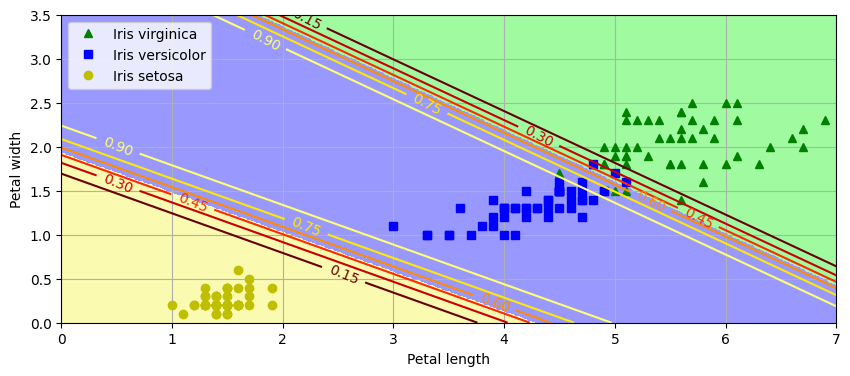

In [57]:
import matplotlib as mpl

custom_cmap = mpl.colors.ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])

x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1),
                     np.linspace(0, 3.5, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new = (X_new - mean) / std
X_new_with_bias = np.c_[np.ones(len(X_new)), X_new]

logits = X_new_with_bias @ Theta
Y_proba = softmax(logits)
y_predict = Y_proba.argmax(axis=1)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label="Iris virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "bs", label="Iris versicolor")
plt.plot(X[y == 0, 0], X[y == 0, 1], "yo", label="Iris setosa")

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap="hot")
plt.clabel(contour, inline=1)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.axis([0, 7, 0, 3.5])
plt.grid()
plt.show()

In [58]:
logits = X_test @ Theta
Y_proba = softmax(logits)
y_predict = Y_proba.argmax(axis=1)

accuracy_score = (y_predict == y_test).mean()
accuracy_score

0.9666666666666667